<a href="https://colab.research.google.com/github/sammatiphugate/sammatiphugate/blob/main/Email_Campaign_Effectiveness_Prediction_sammatiphugate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME : SAMMATI PHUGATE

ROLL NO : DS24MS28

PROJECT TITLE : **InspireDirect Email Campaign Effectiveness Prediction**



**Problem Statement**

Goal: Build a model to classify email interactions into categories like "Ignored," "Read," or "Acknowledged," based on email and recipient features.

Impact: Improve InspireDirect's campaign engagement and conversion rates by personalizing emails based on predicted behaviors.



In [4]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score


**Load Dataset**

In [5]:
df = pd.read_csv('/content/data_email_campaign.csv')


In [6]:
df.head()


,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [7]:
df.columns


Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [9]:
df = df.drop(columns=['Email_ID'])


**Data Cleaning**


In [10]:
# Check for missing values
df.isnull().sum()


,0
Email_Type,0
Subject_Hotness_Score,0
Email_Source_Type,0
Customer_Location,11595
Email_Campaign_Type,0
Total_Past_Communications,6825
Time_Email_sent_Category,0
Word_Count,0
Total_Links,2201
Total_Images,1677


In [11]:
# Fill missing values
df['Customer_Location'] = df['Customer_Location'].fillna('Unknown')


In [12]:

df = df.dropna(subset=['Total_Past_Communications', 'Total_Links','Total_Images'])


In [13]:
df.isna().sum()


,0
Email_Type,0
Subject_Hotness_Score,0
Email_Source_Type,0
Customer_Location,0
Email_Campaign_Type,0
Total_Past_Communications,0
Time_Email_sent_Category,0
Word_Count,0
Total_Links,0
Total_Images,0


In [14]:
df.shape


(58091, 11)

**EDA**


(i) **Univariate Analysis**



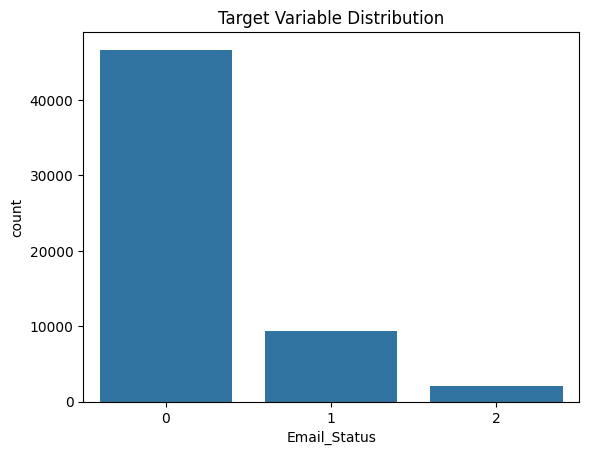

In [15]:
# Target distribution
sns.countplot(x='Email_Status', data=df)
plt.title("Target Variable Distribution")
plt.show()

(i) **Bivariate  Analysis**



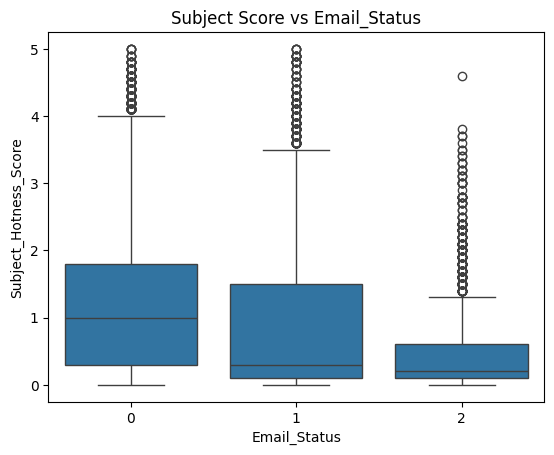

In [16]:
sns.boxplot(x='Email_Status', y='Subject_Hotness_Score', data=df)
plt.title("Subject Score vs Email_Status")
plt.show()

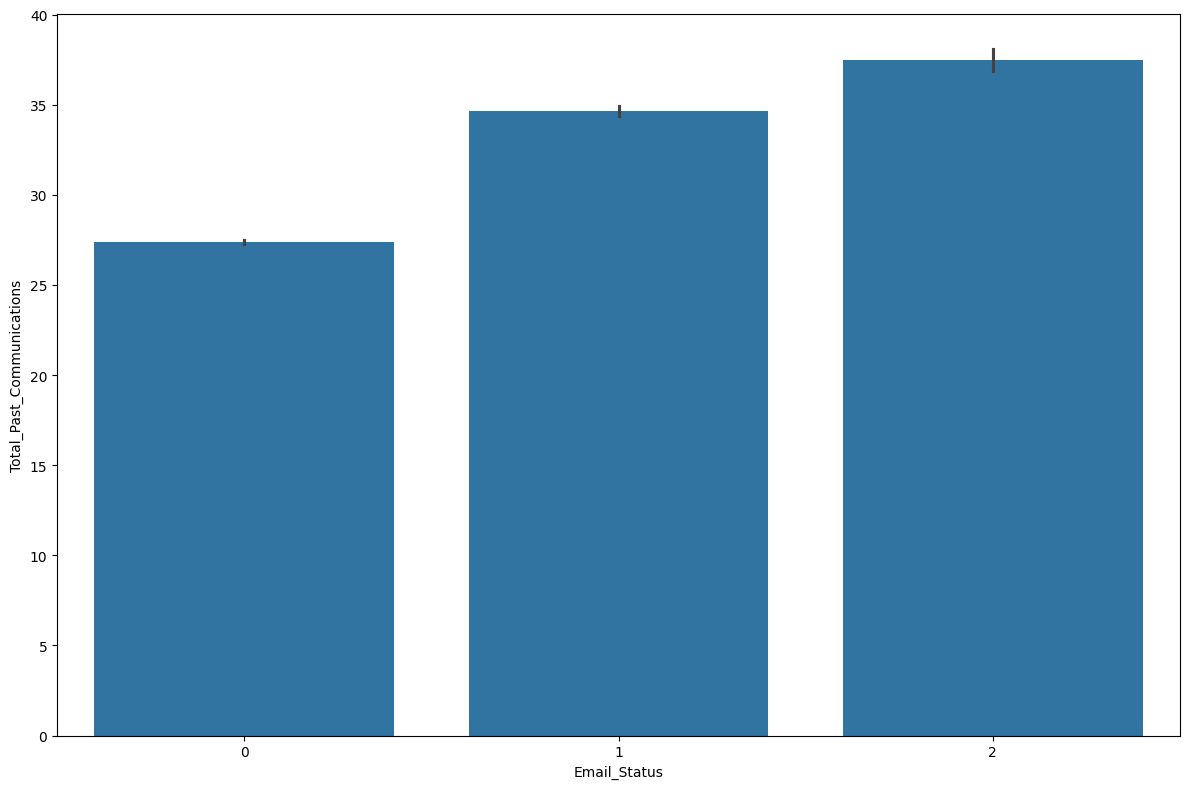

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(df, y='Total_Past_Communications', x = 'Email_Status')
plt.tight_layout()
plt.show()

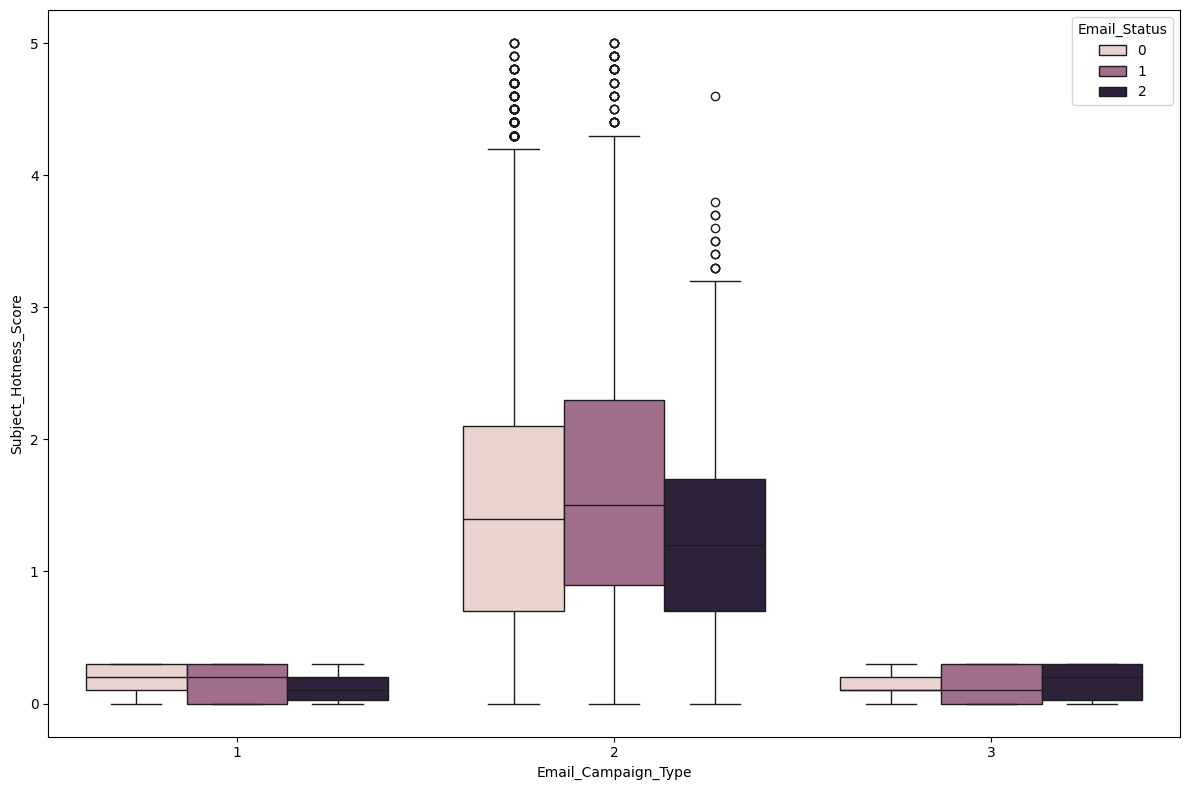

In [18]:
plt.figure(figsize=(12,8))
sns.boxplot(df, y='Subject_Hotness_Score',x='Email_Campaign_Type' ,hue = 'Email_Status')
plt.tight_layout()
plt.show()

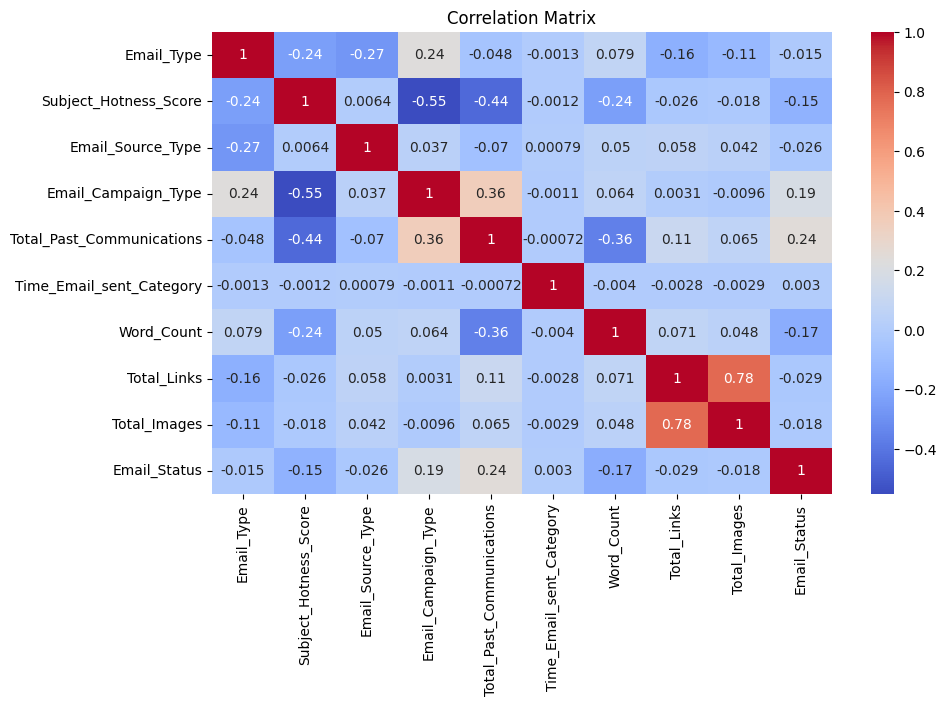

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

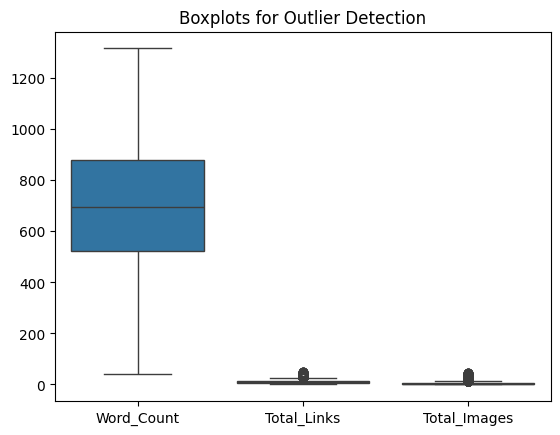

In [20]:
sns.boxplot(data=df[['Word_Count', 'Total_Links', 'Total_Images']])
plt.title('Boxplots for Outlier Detection')
plt.show()

**Distributions and Transformations**

Skewness before transformation: 0.013928793412381903
Skewness after transformation (sqrt): -0.704166402220106


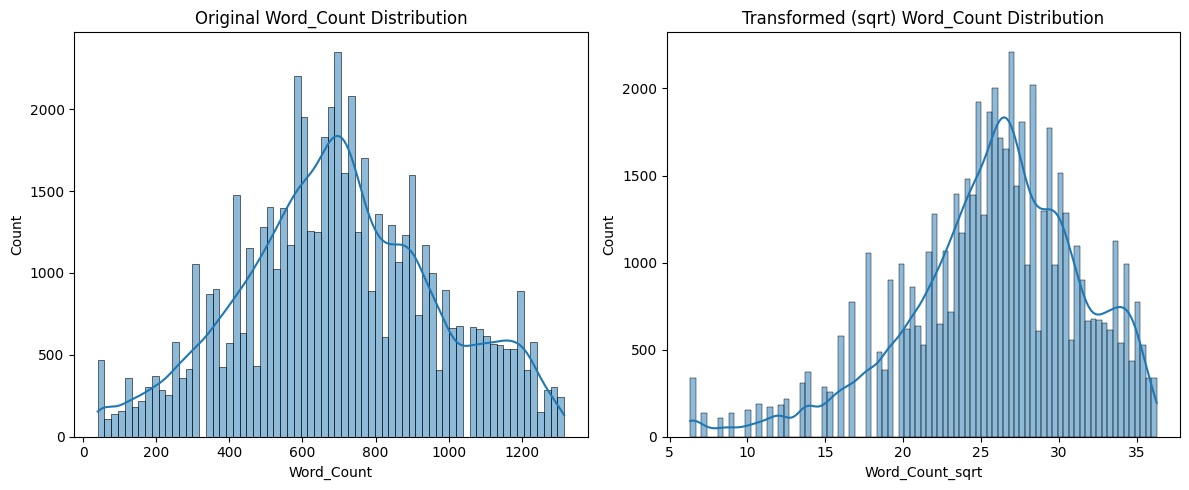

In [21]:
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate and print skewness before transformation
original_skew = skew(df['Word_Count'])
print("Skewness before transformation:", original_skew)

# Create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot original distribution
sns.histplot(df['Word_Count'], kde=True, ax=ax[0])
ax[0].set_title('Original Word_Count Distribution')

# Apply square root transformation
df['Word_Count_sqrt'] = np.sqrt(df['Word_Count'])

# Calculate and print skewness after transformation
transformed_skew = skew(df['Word_Count_sqrt'])
print("Skewness after transformation (sqrt):", transformed_skew)

# Plot transformed distribution
sns.histplot(df['Word_Count_sqrt'], kde=True, ax=ax[1])
ax[1].set_title('Transformed (sqrt) Word_Count Distribution')

plt.tight_layout()
plt.show()


**Feature Engineering**

In [22]:

# List of categorical features to encode
categorical_columns = ['Email_Type', 'Email_Source_Type', 'Email_Campaign_Type', 'Customer_Location', 'Time_Email_sent_Category']

# Apply one-hot encoding for each column individually
for col in categorical_columns:
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df = pd.concat([df.drop(col, axis=1), dummies], axis=1)


**Split Data
 ** *italicized text*

In [23]:
from sklearn.model_selection import train_test_split

# Separate features and target variable using .copy() for safety
features = df.drop(columns=['Email_Status']).copy()
target = df['Email_Status'].copy()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target,
    test_size=0.2,       # 20% test size
    stratify=target,     # Optional: preserves class distribution in train/test
    random_state=42      # Reproducibility
)


**Logistic Regression**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline to standardize and train Logistic Regression
logistic_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=500,
        random_state=42  # Ensures reproducibility
    ))
])

# Fit the pipeline to the training data
logistic_pipeline.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(max_iter=500, multi_class='multinomial',
                                    random_state=42))])

**Prediction & Evaluation**

In [25]:
# Predict class labels
y_pred = logistic_pipeline.predict(X_test)

# Optional: Predict class probabilities
y_proba = logistic_pipeline.predict_proba(X_test)


In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report (includes precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {acc:.4f}")


Confusion Matrix:
[[9130  210    0]
 [1572  307    0]
 [ 297  103    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      9340
           1       0.50      0.16      0.25      1879
           2       0.00      0.00      0.00       400

    accuracy                           0.81     11619
   macro avg       0.44      0.38      0.38     11619
weighted avg       0.75      0.81      0.76     11619

Accuracy Score: 0.8122


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Decision Tree Classifier**

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Initialize the Decision Tree model with default parameters
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Step 2: Train the model on the training data
decision_tree_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
dt_predictions = decision_tree_model.predict(X_test)

# Step 4: Evaluate performance
print("\n📊 Decision Tree Classifier Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, dt_predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
print("\nClassification Report:\n", classification_report(y_test, dt_predictions))



📊 Decision Tree Classifier Evaluation:
Accuracy Score: 0.7213185299939754

Confusion Matrix:
 [[7778 1297  265]
 [1167  555  157]
 [ 212  140   48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      9340
           1       0.28      0.30      0.29      1879
           2       0.10      0.12      0.11       400

    accuracy                           0.72     11619
   macro avg       0.41      0.42      0.41     11619
weighted avg       0.73      0.72      0.73     11619



**Random Forest Classifier**

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Train the model
rf_model.fit(X_train, y_train)

# Step 3: Predict on test data
rf_predictions = rf_model.predict(X_test)

# Step 4: Evaluate model performance
print("\n🌲 Random Forest Classifier Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, rf_predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("\nClassification Report:\n", classification_report(y_test, rf_predictions))



🌲 Random Forest Classifier Evaluation:
Accuracy Score: 0.8109992254066615

Confusion Matrix:
 [[9061  269   10]
 [1509  354   16]
 [ 285  107    8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90      9340
           1       0.48      0.19      0.27      1879
           2       0.24      0.02      0.04       400

    accuracy                           0.81     11619
   macro avg       0.52      0.39      0.40     11619
weighted avg       0.76      0.81      0.77     11619



**K-Nearest Neighbors Classifier**

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune this later

# Step 2: Train the KNN model on scaled training data
knn_model.fit(X_train, y_train)

# Step 3: Predict on scaled test data
knn_predictions = knn_model.predict(X_test)

# Step 4: Evaluate performance
print("\n🤝 K-Nearest Neighbors Classifier Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, knn_predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, knn_predictions))
print("\nClassification Report:\n", classification_report(y_test, knn_predictions))



🤝 K-Nearest Neighbors Classifier Evaluation:
Accuracy Score: 0.7890524141492383

Confusion Matrix:
 [[8850  477   13]
 [1552  310   17]
 [ 311   81    8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.88      9340
           1       0.36      0.16      0.23      1879
           2       0.21      0.02      0.04       400

    accuracy                           0.79     11619
   macro avg       0.46      0.38      0.38     11619
weighted avg       0.73      0.79      0.75     11619



**Support Vector Machine Classifier**

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Initialize the SVM model with RBF kernel (can try 'linear' or 'poly' for different kernels)
svm_model = SVC(kernel='rbf', random_state=42)

# Step 2: Train the SVM model on scaled training data
svm_model.fit(X_train, y_train)

# Step 3: Predict on scaled test data
svm_predictions = svm_model.predict(X_test)

# Step 4: Evaluate model performance
print("\n🔍 Support Vector Machine (SVM) Classifier Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, svm_predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, svm_predictions))
print("\nClassification Report:\n", classification_report(y_test, svm_predictions))



🔍 Support Vector Machine (SVM) Classifier Evaluation:
Accuracy Score: 0.8038557535071865

Confusion Matrix:
 [[9340    0    0]
 [1879    0    0]
 [ 400    0    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      9340
           1       0.00      0.00      0.00      1879
           2       0.00      0.00      0.00       400

    accuracy                           0.80     11619
   macro avg       0.27      0.33      0.30     11619
weighted avg       0.65      0.80      0.72     11619



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
